In [1]:
## Imports and loading DFs

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import seaborn as sns
import scipy.stats as stats
from pathlib import Path

BASE_DIR = Path(r"C:/Users/prida/Desktop/ST238 Project/assignment 2")  # paste dir to folder w/ datasets here
ballet_path = BASE_DIR / "ballet_dancers.csv"
football_path = BASE_DIR / "football_players.csv"

ballet_df = pd.read_csv(ballet_path)
football_df = pd.read_csv(football_path)

ballet_df['activity'] = 'ballet'
football_df['activity'] = 'football'
df = pd.concat([ballet_df, football_df])   # One big df

df.info()     # To get the column names

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Dancer_ID  1500 non-null   float64
 1   Height_cm  3000 non-null   float64
 2   Weight_kg  3000 non-null   float64
 3   activity   3000 non-null   object 
 4   Player_ID  1500 non-null   float64
 5   Position   1500 non-null   object 
dtypes: float64(4), object(2)
memory usage: 164.1+ KB


# Part 3 A) Visualizing Datasets

Well, I first combined the datasets and plotted a broad comparision scatterplot hueing by activity.

Since Ballet seemed to be clustered with no patterns, I focused on football

We can see how positions account for discrepancies in height vs weight (clusters with different colours on the height vs weight plot)

And also, how height and weight (although weight more excessively) diverge from a normal shape

#### I expand on this observations In the modelling part!

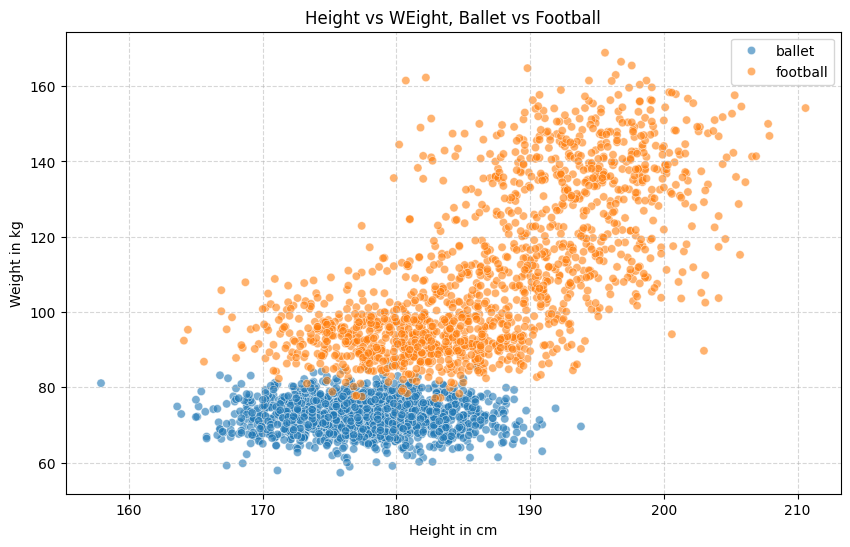

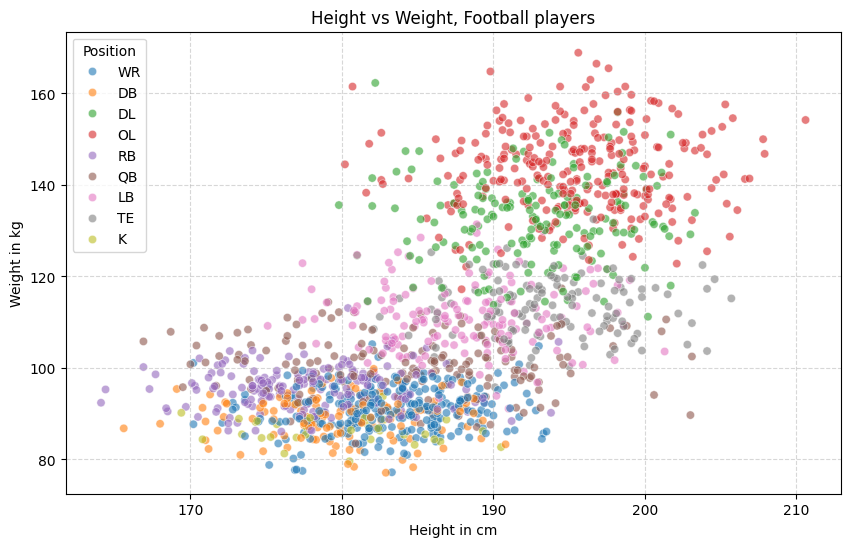

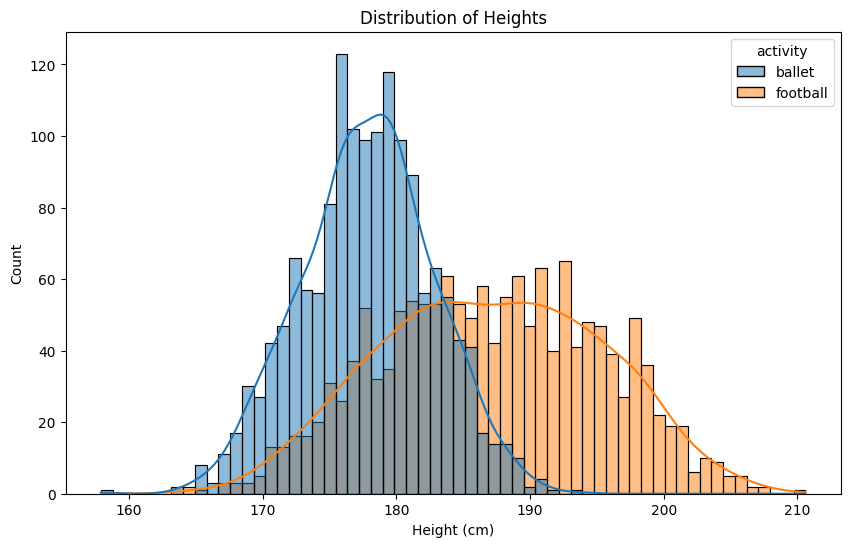

Text(0.5, 0, 'Weight (kg)')

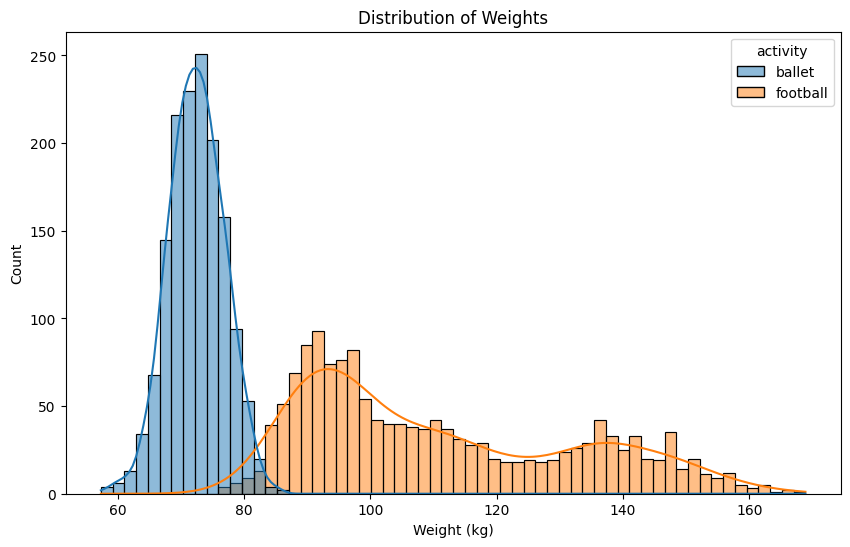

In [2]:
plt.figure(figsize=(10,6))
sns.scatterplot(df, x= 'Height_cm', y = 'Weight_kg', alpha = 0.6, hue = 'activity')
plt.title ("Height vs WEight, Ballet vs Football")
plt.ylabel('Weight in kg')
plt.xlabel('Height in cm')
plt.legend()
plt.grid(True, linestyle= '--', alpha =0.5)
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(football_df, x= 'Height_cm', y = 'Weight_kg', alpha = 0.6, hue = 'Position')
plt.title ("Height vs Weight, Football players")
plt.ylabel('Weight in kg')
plt.xlabel('Height in cm')
plt.legend(title="Position")
plt.grid(True, linestyle= '--', alpha =0.5)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df, x='Height_cm', hue='activity', kde=True, bins = 60)
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weight_kg', hue='activity', kde=True, bins= 60)
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')





# 3 A) Continued: Modelling


From our previous plots we can see that 3 out of 4 distributions appear to lean towards a normal distribution, except for the weight of football players

####  Regarding these 3: 
- I made the assumption that they follow normal distributions almost entirely by inspecting the distribution plots
- alongside the fact that they are mostly genetic and not dependant of some endogenous factor (within the same activity, except for football weight!)
- I then computed the moments in dicts, and looped to generate a normal distb scaled by std and center around the mean

#### Regarding football weights:
- I was initially confused about the purpose of including players' positions but I then had the idea of trying to find a justification for the shape there...
- I initially plotted a normal distribution (which doesnt fit)
- I then plotted a fitted normal skewed distribution using stats.skewnorm.pdf and it fit (can also be a Chi-Squared to moderate-high DOFs?)
- I then separated players by position and plotted those distributions

- The skewed normal of course fit because it was fitted, but when inspecting the violin plot and the individual plots, we can see:   
    - that some do follow a somewhat normal shape
    - others are stretched out
    - some don't have enough observations

Ballet Weights:
 mean:72.44, std:4.39

Ballet Heights:
 mean:177.83, std:4.92

Football Heights:
 mean:187.12, std:8.25

Football Weights:
 mean:110.73, std:21.36



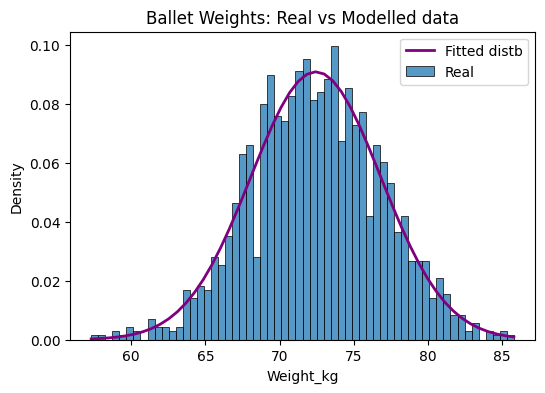

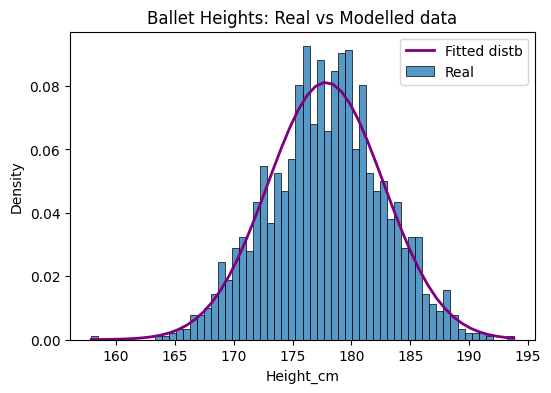

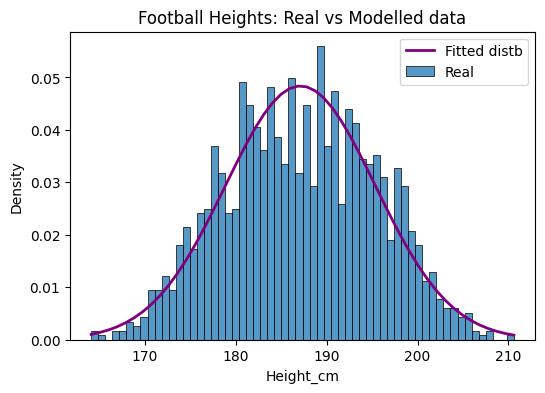

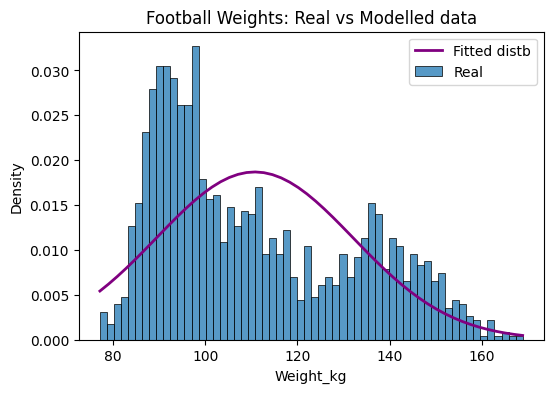

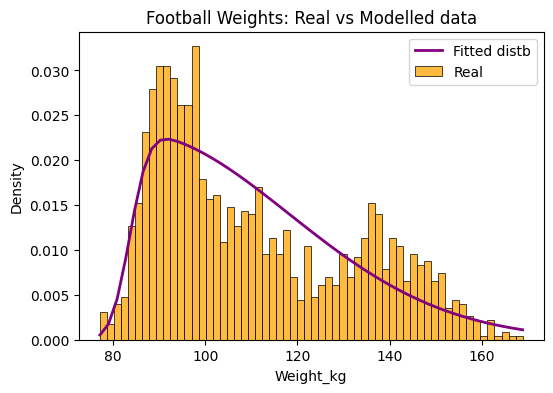

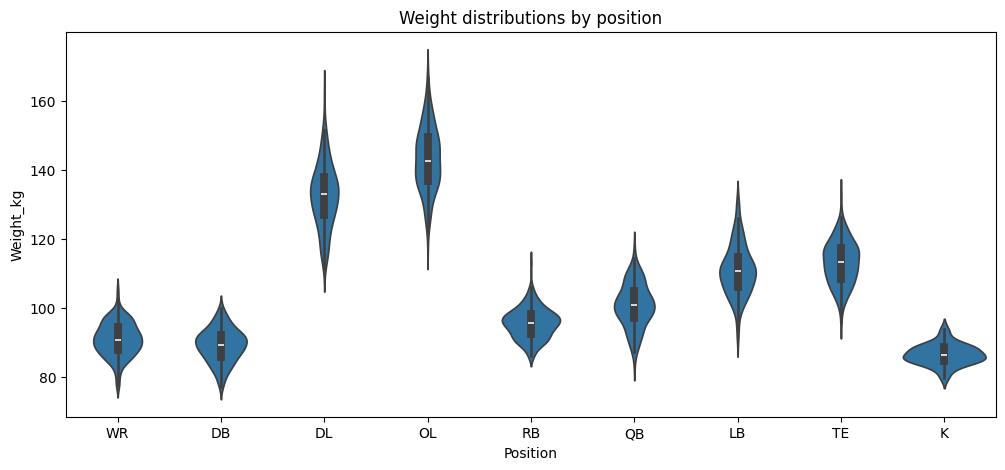

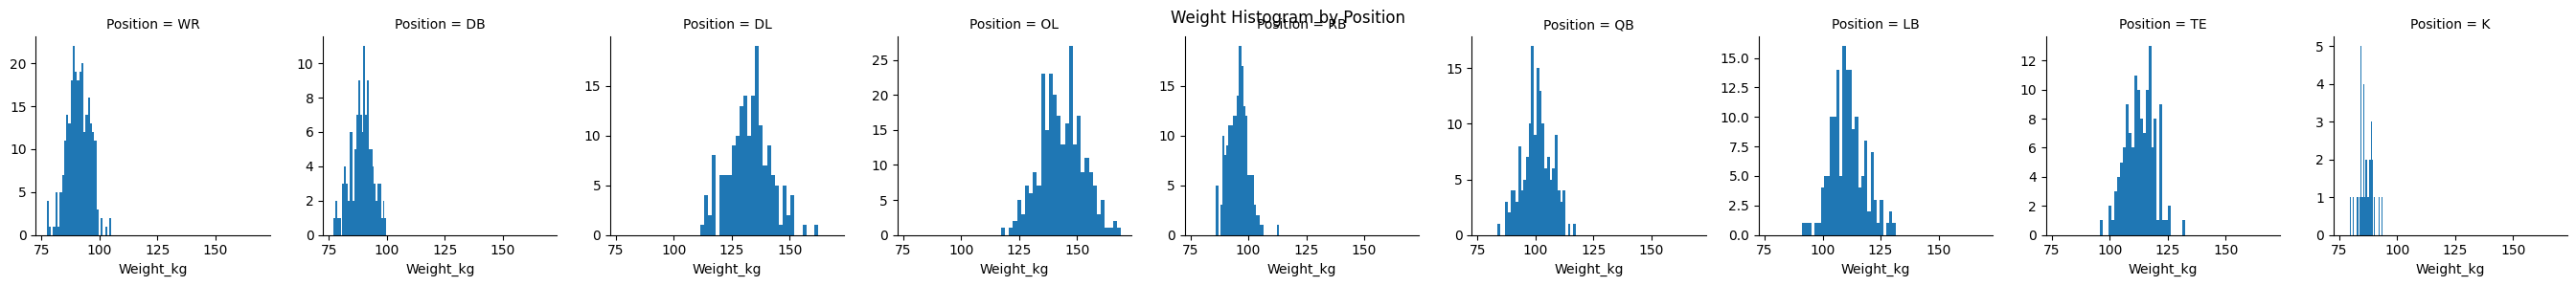

In [3]:
# Modelling

# Dicts with moments and data
ballet_w = {'data': ballet_df['Weight_kg'], 'mean': ballet_df['Weight_kg'].mean(), 'std': ballet_df['Weight_kg'].std(), 'title': 'Ballet Weights' }
ballet_h = {'data': ballet_df['Height_cm'], 'mean': ballet_df['Height_cm'].mean(), 'std': ballet_df['Height_cm'].std(), 'title': 'Ballet Heights'}
football_w = {'data': football_df['Weight_kg'], 'mean': football_df['Weight_kg'].mean(), 'std': football_df['Weight_kg'].std(), 'title': 'Football Weights'}
football_h = {'data': football_df['Height_cm'], 'mean': football_df['Height_cm'].mean(), 'std': football_df['Height_cm'].std(),'title': 'Football Heights'}
master_list = []
master_list.append(ballet_w), master_list.append(ballet_h), master_list.append(football_h), master_list.append(football_w)


# Loop to fit, plot

for dict in master_list:
  
  data = dict['data']
  mean = dict['mean']
  std = dict['std']
  title = dict['title']

  print(f'{title}:\n mean:{mean:.2f}, std:{std:.2f}\n')

  min, max = data.min(), data.max()
  x_line = np.linspace(min,max)
  fitted_distb = stats.norm.pdf(x_line, loc=mean, scale=std)

  plt.figure(figsize = (6,4))
  sns.histplot(data, stat='density', label=('Real'), bins = 60)
  plt.plot(x_line, fitted_distb, color = 'purple', label = ('Fitted distb'), linewidth = 2)
  plt.title(f'{title}: Real vs Modelled data')
  plt.legend()


## Accounting for skew in football weight (Can also be chi squared with some moderate high DoF)
## Special if for football weights
if dict == master_list[3]:
    
    a_skew, loc_skew, scale_skew = stats.skewnorm.fit(data)
    skewed_distb = stats.skewnorm.pdf(x_line, a=a_skew, loc= loc_skew, scale=scale_skew)
    # New plot
    plt.figure(figsize = (6,4))
    sns.histplot(football_df['Weight_kg'], stat='density', label=('Real'), bins = 60, color = 'orange')
    plt.plot(x_line, skewed_distb, color = 'purple', label = ('Fitted distb'), linewidth = 2)
    plt.title(f'{title}: Real vs Modelled data')
    plt.legend()
 


# Very.. particular plots to see if the weight distributions by position seemed more normal-shape

plt.figure(figsize=(12,5))
sns.violinplot(data = football_df, x= 'Position', y= 'Weight_kg')
plt.title('Weight distributions by position')
plt.show()

grid = sns.FacetGrid(football_df, col="Position", sharey=False)
grid.map(plt.hist, "Weight_kg", bins=30)
grid.figure.suptitle('Weight Histogram by Position')
plt.show()



# Part 3 b) Trends in Stock Prices

I've taken econometrics so this is just a trend stationary process.  
I've plotted the deterministic as the thick line, and adjusted sigma since 0.02 can't even be seen in the plot.  

#### Observations:

- Regardless of sigma, we see that all simulations 'wrap' the deterministic components, this is due to E(r_t) = E(f(x)), since our stochastic term is just N(0,sigma^2)

- There is no autoregressive component or anything of the sort to introduce discrepancies (like a random walk)

- As a result, the price just follows the sinusoidal pattern with minor noise. 

- The expectancy remains the same: E(r_t) = E(f(x)) + E(N(0,sigma^2)), where the second term equals 0.
 

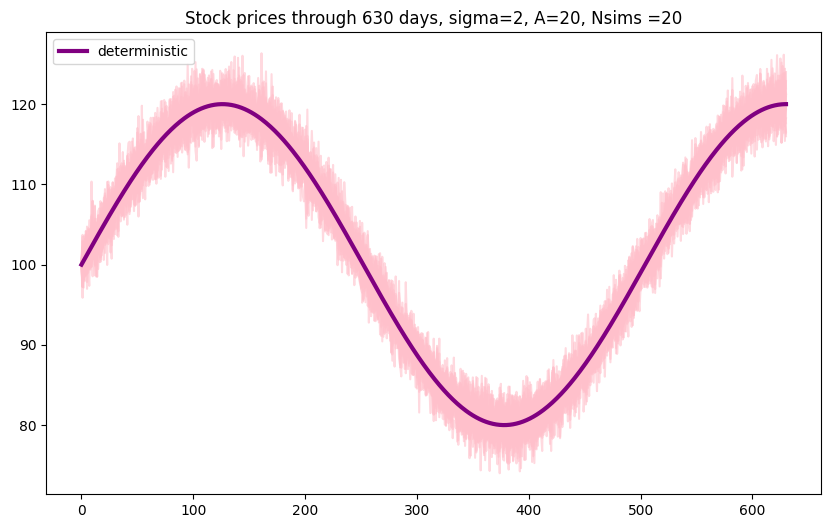

starting price: $100, final price: $120.0
Note: Sigma at 0.02 wouldnt allow to see the noise (it overlapped), so I changed it to: "2"


In [4]:
# Initial setup

A = 20
sigma = 2
starting_price = 100
T = 630
n_sims = 20
list_of_prices = []
deterministic_price_series = [starting_price]


# I pulled out this part from the bigger loop when I realized It didnt change across sims, saving compute

for t in range (1, T + 1):
  
  deterministic_price = starting_price + A * np.sin(( (np.pi* t) / 252) ) 
  deterministic_price_series.append(deterministic_price)

# Simulations
for sim in range(n_sims): 

  price_series = [starting_price]
  
  for t in range (1, T + 1):
      
      current_price = starting_price + A * np.sin(( (np.pi* t) / 252) ) + np.random.normal(0, sigma)
      price_series.append(current_price)

  list_of_prices.append(price_series)
  
#Plotting

plt.figure(figsize=(10,6))
plt.title(f'Stock prices through {T} days, sigma={sigma}, A={A}, Nsims ={n_sims}')
plt.plot(deterministic_price_series, label= 'deterministic', color = 'purple', linewidth = 3, zorder=100)
for series in list_of_prices:
  plt.plot(series, color = 'pink', alpha = 0.6)
plt.legend()
plt.show()
print(f'starting price: ${starting_price}, final price: ${deterministic_price_series[-1]}')
print(f'Note: Sigma at 0.02 wouldnt allow to see the noise (it overlapped), so I changed it to: "{sigma}"')

